# Predicting Bitcoin price using time series forecasting in TensorFlow

# Importing time series data using `pandas`

In [ ]:
import pandas as pd

bitcoin_df = pd.read_csv("/content/BTC_USD_2013_2021.csv",
                         parse_dates=["Date"],
                         index_col=["Date"])
bitcoin_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(bitcoin_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


<Axes: title={'center': 'Price of Bitcoin from 1st of October 2013 to 18th of May 2021'}, xlabel='Date', ylabel='BTC Price'>

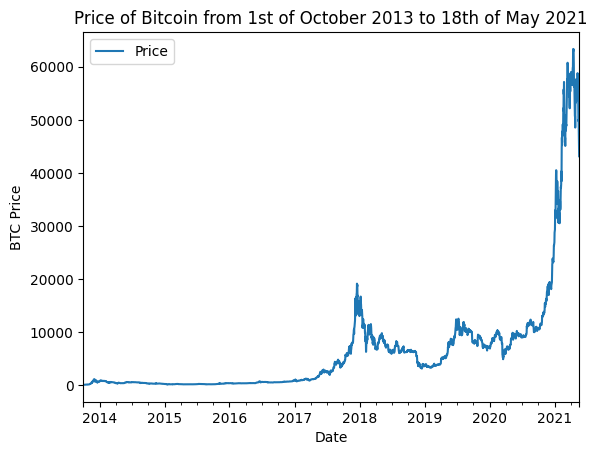

In [ ]:
# visualize the prices
bitcoin_prices.plot(xlabel="Date", ylabel="BTC Price", title="Price of Bitcoin from 1st of October 2013 to 18th of May 2021")

# Split the time series data into train and test sets

In [ ]:
# set split percentage
split_range = int(0.8 * len(bitcoin_prices))

In [ ]:
# split the bitcoin_prices into date and price
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.values
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([[  123.65499   ],
        [  125.455     ],
        [  108.58483   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
train_data, train_labels = timesteps[:split_range], prices[:split_range]
test_data, test_labels = timesteps[split_range:], prices[split_range:]

# Creating a plotting function

In [ ]:
# create a function to plot time series data
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.legend(fontsize=14) # make label bigger
    plt.grid(True)


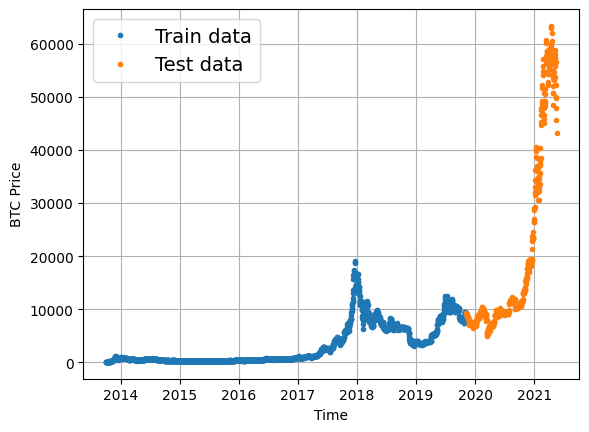

In [ ]:
plt.figure()
plot_time_series(timesteps=train_data, values=train_labels, label="Train data")
plot_time_series(timesteps=test_data, values=test_labels, label="Test data")

# Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, ***horizon and window***.

* **horizon** = number of timesteps to predict into future
* **window** = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

* Naïve model (baseline)
* Dense model	h=1	w=7
* Same as 1	h=1	w=30
* Same as 1	h=7	w=30
* Conv1D	h=1	w=7
* LSTM	h=1	w=7
* Same as 1 (but with multivariate data)	h=1	w=7	Block reward size
* N-BEATs Algorithm	h=1	w=7
* Ensemble (multiple models optimized on different loss functions)	h=1	w=7
* Future prediction model (model to predict future values)	h=1	w=7
* Same as 1 (but with turkey data introduced)	h=1	w=7



# Model 0: Naïve forecast (baseline)

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this: $$\hat{y}_{t} = y_{t-1}$$

In an open system (like a stock market or crypto market), you'll often find ***beating the naïve forecast with any kind of model is quite hard***.

**An open system** is a system where **inputs and outputs can freely flow**, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system. Time series forecasting in open systems is generally quite poor.

In [ ]:
# create a naive forecast
naive_forecast = test_labels[:-1]

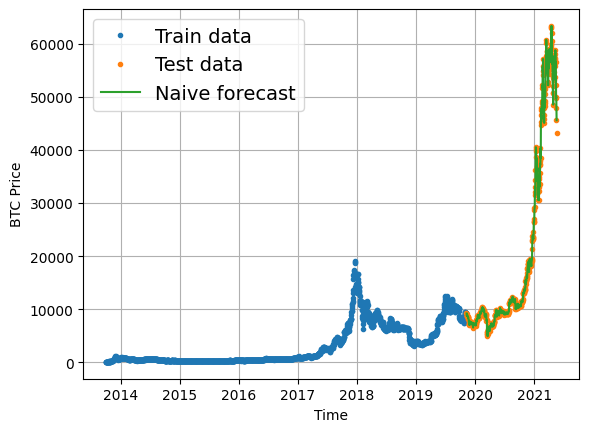

In [ ]:
# plot naive forecast
plt.figure()
plot_time_series(timesteps=train_data, values=train_labels, label="Train data")
plot_time_series(timesteps=test_data, values=test_labels, label="Test data")
plot_time_series(timesteps=test_data[1:], values=naive_forecast, format="-", label="Naive forecast")

# Metrics for evaluating a time series model

Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

We can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: how do our model's predictions compare against the actual values (ground truth values)?

For all of the following metrics, ***a lower value means a better prediction***.

***Scale-dependent errors*** are metrics which can be used to compare time series values and forecasts that are on the same scale.

* MAE (mean absolute error): easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median.

* RMSE (root mean square error): forecasts which minimise the RMSE lead to forecasts of the mean.

***Percentage errors*** do not have units, this means they can be used to compare forecasts across different datasets.

* MAPE (mean absolute percentage error): most commonly used percentage error. May explode (not work) if y=0.

* sMAPE (symmetric mean absolute percentage error): recommended not to be used by *Forecasting: Principles and Practice*, though it is used in forecasting competitions.

***Scaled errors*** are an alternative to percentage errors when comparing forecast performance across different time series.

* MASE (mean absolute scaled error): MASE equals one for the naive forecast (or very close to one). ***A forecast which performs better than the naïve should get <1 MASE.***

MAE is often a very good place to start.




In [ ]:
import tensorflow as tf

# implementation of MASE
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=test_labels[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def get_metrics(y_true, y_pred):
  # dtype float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # calculate various metrics
  mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
  mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred)) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

**Note:** Numpy works with ***float64 variables*** whereas TensorFlow works with ***float32 variables***.

In [ ]:
naive_results = get_metrics(y_true=test_labels[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165246,
 'mase': 0.99957}

# Format Data using ***NumPy's array indexing***: Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1).

Window for one week (univariate time series)

**[0, 1, 2, 3, 4, 5, 6] -> [7]**

**[1, 2, 3, 4, 5, 6, 7] -> [8]**

**[2, 3, 4, 5, 6, 7, 8] -> [9]**

We'll build some functions which take in a univariate time series and turn it into windows and horizons of specified sizes.


In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.
  """
  return x[:, :-horizon], x[:, -horizon:]

Write a function which:

1. Creates a window step of specific window size
2. Uses NumPy indexing to create a 2D array of multiple window steps, for example:

    [[0, 1, 2, 3, 4, 5, 6, 7],

    [1, 2, 3, 4, 5, 6, 7, 8],

    [2, 3, 4, 5, 6, 7, 8, 9]]
3. Uses the 2D array of multiple window steps to index on a target series
4. Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

In [ ]:
import numpy as np

# create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f"Window step:\n {window_step}\n")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


**Note:** You can find a function which achieves similar results to the ones we implemented above at `tf.keras.preprocessing.timeseries_dataset_from_array()`. It takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a `tf.data.Dataset` instance.

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(f"\nNumber of windows: {len(full_windows)}",
      f"\nNumber of horizons: {len(full_labels)}")

Window step:
 [[0 1 2 3 4 5 6 7]]

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))

Number of windows: 2780 
Number of horizons: 2780


# Turning windows into training and test sets

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.




In [ ]:
# make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int((1-test_split) * len(windows))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(full_windows, full_labels)
train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2224, 7, 1), (2224, 1, 1), (556, 7, 1), (556, 1, 1))

In [ ]:
# squeeze the last dimension for train_windows and test_windows
train_windows = np.squeeze(train_windows)
test_windows = np.squeeze(test_windows)
train_windows.shape, test_windows.shape

((2224, 7), (556, 7))

In [ ]:
# check to see if train_horizons is the same as train_labels (accounting for horizon and window size)
np.array_equal(np.squeeze(train_horizons[:-HORIZON-1]), np.squeeze(train_labels[WINDOW_SIZE:]))

True

# Make a modelling checkpoint

We want to compare each model's best performance against each model's best performance.

The `ModelCheckpoint` callback will monitor our model's performance during training and save the best model to file by setting `save_best_only=True`.

That way when evaluating our model we could restore its best performing configuration from file.

**Note:** Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the `ModelCheckpoint` callback to save the best model).



In [ ]:
import os

# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor="val_loss",
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense model (window = 7, horizon = 1)

***Often, going through preprocessing and preparing data for a model is one of the largest parts of any machine learning project.***

And once you've got a good model in place, you'll probably notice far more improvements from manipulating the data than manipulating the model.

**model_1** will have:

* A dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


**Note:** As always, many of the values for machine learning problems are experimental. A reminder that the values you can set yourself in a machine learning algorithm (the hidden units, the batch size, horizon size, window size) are called ***hyperparameters***. And experimenting to find the best values for hyperparameters is called hyperparameter tuning. Where as parameters learned by a model itself (patterns in the data, formally called weights & biases) are referred to as ***parameters***.


In [ ]:
import tensorflow as tf

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# compile model
model_1.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_horizons, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_1.name)], # create ModelCheckpoint callback to save best model
            verbose=1)


Epoch 1/100
18/18 [==============================] - 1s 40ms/step - loss: 924.3657 - mae: 924.3657 - val_loss: 2475.8025 - val_mae: 2475.8025
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 269.1977 - mae: 269.1977 - val_loss: 1252.9298 - val_mae: 1252.9298
Epoch 3/100
18/18 [==============================] - 1s 39ms/step - loss: 212.8669 - mae: 212.8669 - val_loss: 1113.8712 - val_mae: 1113.8712
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 197.3427 - mae: 197.3427 - val_loss: 1105.1094 - val_mae: 1105.1094
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 193.8887 - mae: 193.8887 - val_loss: 1148.1124 - val_mae: 1148.1124
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 187.4451 - mae: 187.4451 - val_loss: 1041.5333 - val_mae: 1041.5333
Epoch 7/100
18/18 [==============================] - 1s 38ms/step - loss: 175.7577 - mae: 175.7577 - val_loss: 955.6517 - val_mae: 955.6517
Epoch 8/1

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 128)               1024      
                                                                 
 dense_179 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# evaluate model on test data
model_1.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 571.0964 - mae: 571.0964


[571.0963745117188, 571.0963745117188]

In [ ]:
# load in saved best performing model_1 and evaluate on test data
model_1_loaded = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1_loaded.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 571.0964 - mae: 571.0964


[571.0963745117188, 571.0963745117188]

In [ ]:
def make_predictions(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    model: trained model
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions


In [ ]:
# make predictions using model_1 on the test dataset and view the results
model_1_predictions = make_predictions(model_1_loaded, test_windows)
model_1_predictions

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8868.771 ,  8772.182 ,  9030.068 ,  8781.615 ,  8752.592 ,
        8745.478 ,  8703.111 ,  8497.671 ,  8471.379 ,  8526.9795,
        8255.597 ,  8132.5996,  8062.816 ,  7709.9883,  7346.173 ,
        7311.2896,  7116.651 ,  7211.749 ,  7154.986 ,  7490.095 ,
        7422.3096,  7722.0293,  7591.186 ,  7449.765 ,  7319.529 ,
        7339.5938,  7217.8267,  7363.2607,  7510.5557,  7557.5845,
        7560.313 ,  7389.6377,  7256.932 ,  7195.388 ,  7192.6045,
        7221.996 ,  7112.1113,  7107.956 ,  6915.481 ,  6642.893 ,
        7276.5684,  7236.517 ,  7163.1685,  7241.7197,  7327.0537,
        7170.885 ,  7228.4873,  7237.7373,  7196.25  ,  7223.127 ,
        7317.3267,  7393.136 ,  7287.7446,  7198.2812,  7179.251 ,
        6994.342 ,  7230.331 ,  7346.819 ,  7378.682 ,  7665.3584,
        8061.4756,  8125.9004,  7879.3555,  8076.064 ,  8121.895 ,
        8169.1733,  8118.97  ,  8689.47  ,  8884.945 ,  8792.709 ,
        8908.7

In [ ]:
# get metrics from the predictions
model_1_results = get_metrics(y_true=np.squeeze(test_horizons), # reduce to right shape
                              y_pred=model_1_predictions)
model_1_results

{'mae': 571.09644,
 'mse': 1177693.9,
 'rmse': 1085.2161,
 'mape': 2.5558887,
 'mase': 1.0032582}

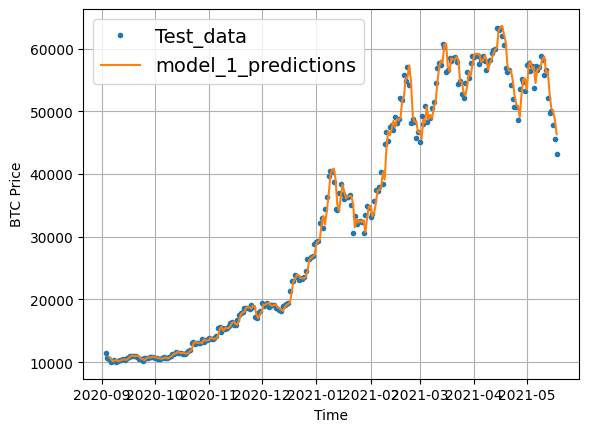

In [ ]:
offset = 300
plt.figure()
# account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=test_data, values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=test_data[-len(test_windows):], values=model_1_predictions, start=offset, format="-", label="model_1_predictions")

# Model 2: Dense (window = 30, horizon = 1)

**Note:** Recall from before, the window size (how many timesteps to use to fuel a forecast) and the horizon (how many timesteps to predict into the future) are ***hyperparameters***. This means you can tune them to try and find values will result in better performance.

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [ ]:
# make train and testing windows
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(windows=full_windows, labels=full_labels)
train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2205, 30, 1), (2205, 1, 1), (552, 30, 1), (552, 1, 1))

In [ ]:
# squeeze the last dimension for train_windows and test_windows
train_windows = np.squeeze(train_windows)
test_windows = np.squeeze(test_windows)
train_windows.shape, test_windows.shape

((2205, 30), (552, 30))

In [ ]:
import tensorflow as tf

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_2_dense") # give the model a name so we can save it

# compile model
model_2.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_2.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_horizons, # horizon value of 1
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_2.name)], # create ModelCheckpoint callback to save best model
            verbose=1)


Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 1194.9937 - mae: 1194.9937 - val_loss: 4096.2739 - val_mae: 4096.2739
Epoch 2/100
18/18 [==============================] - 1s 33ms/step - loss: 377.8492 - mae: 377.8492 - val_loss: 1402.9768 - val_mae: 1402.9768
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 291.7733 - mae: 291.7733 - val_loss: 1509.0476 - val_mae: 1509.0476
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 236.5186 - mae: 236.5186 - val_loss: 1219.2903 - val_mae: 1219.2903
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 216.9914 - mae: 216.9914 - val_loss: 1316.9479 - val_mae: 1316.9479
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 206.3738 - mae: 206.3738 - val_loss: 1043.8555 - val_mae: 1043.8555
Epoch 7/100
18/18 [==============================] - 1s 38ms/step - loss: 196.6921 - mae: 196.6921 - val_loss: 1023.6973 - val_mae: 1023.6973
Epoch 

In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 128)               3968      
                                                                 
 dense_181 (Dense)           (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# evaluate model
model_2.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 692.8426 - mae: 692.8426


[692.8425903320312, 692.8425903320312]

In [ ]:
# load in best performing model
model_2_loaded = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_loaded.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 597.4429 - mae: 597.4429


[597.44287109375, 597.44287109375]

In [ ]:
# get forecast predictions
model_2_predictions = make_predictions(model_2_loaded, input_data=test_windows)
model_2_predictions

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8856.877 ,  8828.652 ,  8716.759 ,  8615.959 ,  8544.043 ,
        8272.417 ,  8205.248 ,  8243.514 ,  8215.372 ,  7732.4976,
        7341.8228,  7268.8306,  6963.9683,  7079.644 ,  7148.7896,
        7375.5986,  7366.842 ,  7729.2085,  7559.527 ,  7499.788 ,
        7293.4077,  7271.807 ,  7210.2417,  7373.2993,  7445.0234,
        7495.57  ,  7547.7124,  7426.362 ,  7191.996 ,  7227.1543,
        7201.7583,  7195.842 ,  7139.4595,  7157.709 ,  6906.6543,
        6697.427 ,  7155.9272,  7182.71  ,  7147.057 ,  7275.3403,
        7267.2915,  7186.9644,  7403.485 ,  7192.0234,  7096.107 ,
        7221.0684,  7314.989 ,  7341.5625,  7326.5747,  7254.7646,
        7195.5894,  6982.204 ,  7217.2334,  7292.2817,  7367.6904,
        7670.6387,  7991.978 ,  8082.529 ,  8026.8403,  7956.885 ,
        8067.6704,  8246.44  ,  8194.911 ,  8606.3   ,  8751.037 ,
        8896.008 ,  8959.159 ,  8940.755 ,  8734.8125,  8764.26  ,
        8709.5

In [ ]:
# get metrics
model_2_results = get_metrics(y_true=tf.squeeze(test_horizons), # remove 1 dimension of test labels
                              y_pred=model_2_predictions)
model_2_results

{'mae': 597.4429,
 'mse': 1215155.8,
 'rmse': 1102.341,
 'mape': 2.738747,
 'mase': 1.044336}

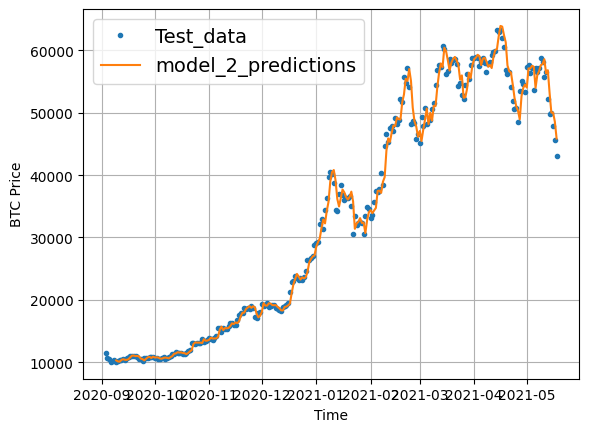

In [ ]:
offset = 300
plt.figure()
# account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=test_data, values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=test_data[-len(test_windows):], values=model_2_predictions, start=offset, format="-", label="model_2_predictions")

# Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7 # predict 7 steps at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [ ]:
# make train and testing windows
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(windows=full_windows, labels=full_labels)
train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2200, 30, 1), (2200, 7, 1), (551, 30, 1), (551, 7, 1))

In [ ]:
# squeeze the last dimension for train_windows and test_windows
train_windows = np.squeeze(train_windows)
test_windows = np.squeeze(test_windows)
train_windows.shape, test_windows.shape

((2200, 30), (551, 30))

In [ ]:
import tensorflow as tf

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_3_dense") # give the model a name so we can save it

# compile model
model_3.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_3.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_horizons, # horizon value of 7
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_3.name)], # create ModelCheckpoint callback to save best model
            verbose=1)


Epoch 1/100
18/18 [==============================] - 2s 49ms/step - loss: 1129.8506 - mae: 1129.8506 - val_loss: 3420.8865 - val_mae: 3420.8865
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 480.2610 - mae: 480.2610 - val_loss: 2414.2170 - val_mae: 2414.2170
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 376.9600 - mae: 376.9600 - val_loss: 1827.3020 - val_mae: 1827.3020
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 338.2721 - mae: 338.2721 - val_loss: 1856.1039 - val_mae: 1856.1039
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 322.9307 - mae: 322.9307 - val_loss: 1713.5536 - val_mae: 1713.5536
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 306.3738 - mae: 306.3738 - val_loss: 1605.3406 - val_mae: 1605.3406
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 291.8216 - mae: 291.8216 - val_loss: 1556.5999 - val_mae: 1556.5999
Epoch

In [ ]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_182 (Dense)           (None, 128)               3968      
                                                                 
 dense_183 (Dense)           (None, 7)                 903       
                                                                 
Total params: 4871 (19.03 KB)
Trainable params: 4871 (19.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# evaluate model
model_3.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 1293.3489 - mae: 1293.3489


[1293.348876953125, 1293.348876953125]

In [ ]:
# load in best performing model
model_3_loaded = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3_loaded.evaluate(test_windows, test_horizons)

18/18 [==============================] - 1s 2ms/step - loss: 1234.4894 - mae: 1234.4894


[1234.4893798828125, 1234.4893798828125]

In [ ]:
# get forecast predictions
model_3_predictions = make_predictions(model_3_loaded, input_data=test_windows)
model_3_predictions

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9225.197,  9294.167,  9511.643, ...,  9429.559,  9482.027,
         9551.892],
       [ 8865.844,  8984.608,  8983.957, ...,  9077.273,  9020.747,
         9377.441],
       [ 8766.658,  8794.986,  9011.449, ...,  8902.052,  8783.015,
         9221.366],
       ...,
       [57942.383, 58246.62 , 59045.547, ..., 58523.38 , 59308.   ,
        59714.098],
       [58712.25 , 57978.496, 58623.242, ..., 59133.95 , 58913.082,
        58928.22 ],
       [56742.434, 57120.31 , 57939.82 , ..., 56803.387, 57547.707,
        59247.45 ]], dtype=float32)>

In [ ]:
# get metrics
model_3_results = get_metrics(y_true=tf.squeeze(test_horizons), # remove 1 dimension of test labels
                              y_pred=model_3_predictions)
model_3_results

{'mae': 1234.4894,
 'mse': 5284851.0,
 'rmse': 2298.8804,
 'mape': 5.547508,
 'mase': 2.1967046}

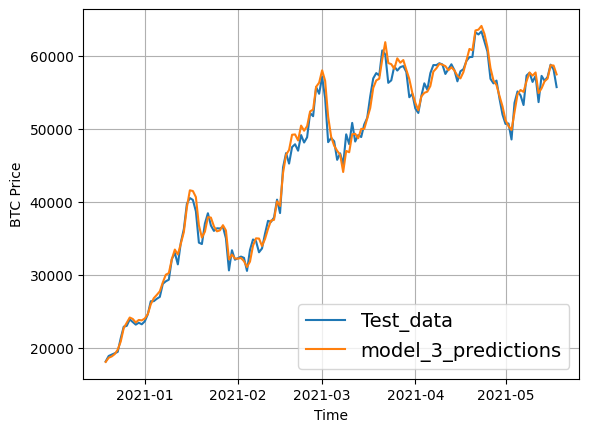

In [ ]:
offset = 400
plt.figure()
# Plot model_3_predictions by aggregating them (note: this condenses information so the predictions will look fruther ahead than the test data)
plot_time_series(timesteps=test_data[-len(test_windows):],
                 values=test_labels[:-HORIZON, 0],
                 start=offset,
                 format="-",
                 label="Test_data")
plot_time_series(timesteps=test_data[-len(test_windows):],
                 values=tf.reduce_mean(model_3_predictions, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_predictions")

 **Note:** ***Aggregating the predictions*** (reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. The model predictions were trained to be made for 7-days but by reducing them to one, ***we gain the ability to plot them visually but we lose the extra information contained across multiple days***.

# Naïve results and autocorrelation

Why are the naïve results so good ***compared to the regression results***?

One of the reasons could be due to the presence of ***autocorrelation in the data***. If a time series has autocorrelation it means the value at **t+1 (the next timestep)** is typically close to the value at **t (the current timestep)**. In other words, today's value is probably close to yesterday's value. This isn't always the case but when it is, a naïve model will often get good results.

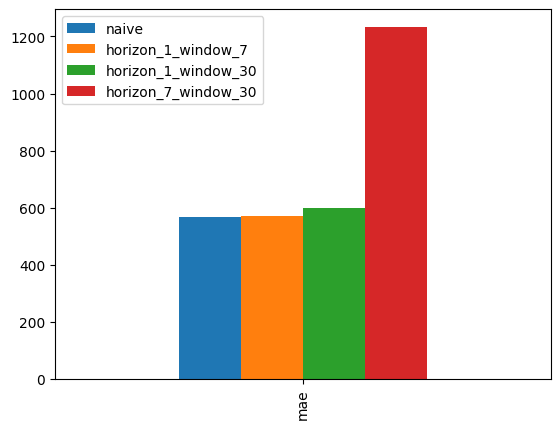

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(kind="bar");

# Model 4: Conv1D

We'll be using a Conv1D model. ***Conv1D models can be used for seq2seq (sequence to sequence) problems***.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day. **In seq2seq terms this is called a many to one problem**.

Framing Bitcoin forecasting in seq2seq (sequence to sequence) terms by using a window size of 7 and a horizon of 1 results in a many to one problem. Using a window size of >1 and a horizon of >1 results in a many to many problem.

***Convolutional models accept tensors for training of at least 3 dimensions.***

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use 7 timesteps in the past

In [ ]:
# make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
# make train and testing windows
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(windows=full_windows, labels=full_labels)
train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2224, 7, 1), (2224, 1, 1), (556, 7, 1), (556, 1, 1))

In [ ]:
# reshape the last dimension for train_windows and test_windows
train_windows = train_windows.reshape((train_windows.shape[0], train_windows.shape[2], train_windows.shape[1]))
test_windows = test_windows.reshape((test_windows.shape[0], test_windows.shape[2], test_windows.shape[1]))
train_windows.shape, test_windows.shape

((2224, 1, 7), (556, 1, 7))

In [ ]:
import tensorflow as tf

# create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_4_conv1d") # give the model a name so we can save it

# compile model
model_4.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_4.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_horizons, # horizon value of 1
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_4.name)], # create ModelCheckpoint callback to save best model
            verbose=1)

Epoch 1/100
18/18 [==============================] - 6s 56ms/step - loss: 2146.5955 - mae: 2146.5955 - val_loss: 2880.9353 - val_mae: 2880.9353
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 388.3887 - mae: 388.3887 - val_loss: 1236.9020 - val_mae: 1236.9020
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 235.7319 - mae: 235.7319 - val_loss: 1149.2180 - val_mae: 1149.2180
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 203.6353 - mae: 203.6353 - val_loss: 1093.0380 - val_mae: 1093.0380
Epoch 5/100
18/18 [==============================] - 0s 29ms/step - loss: 195.7686 - mae: 195.7686 - val_loss: 1078.4454 - val_mae: 1078.4454
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 192.4947 - mae: 192.4947 - val_loss: 1060.2710 - val_mae: 1060.2710
Epoch 7/100
18/18 [==============================] - 1s 30ms/step - loss: 188.3328 - mae: 188.3328 - val_loss: 1031.1840 - val_mae: 1031.1840
Epoc

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_184 (Dense)           (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# evaluate model
model_4.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 576.0573 - mae: 576.0573


[576.0573120117188, 576.0573120117188]

In [ ]:
# load in best performing model
model_4_loaded = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4_loaded.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 569.0244 - mae: 569.0244


[569.0244140625, 569.0244140625]

In [ ]:
# get forecast predictions
model_4_predictions = make_predictions(model_4_loaded, input_data=test_windows)
model_4_predictions

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8899.458 ,  8786.548 ,  9008.33  ,  8806.647 ,  8739.334 ,
        8746.543 ,  8689.887 ,  8544.344 ,  8464.6045,  8525.732 ,
        8286.837 ,  8125.957 ,  8072.9023,  7710.321 ,  7318.763 ,
        7247.1973,  7076.0767,  7144.457 ,  7139.97  ,  7435.0693,
        7451.1533,  7671.5464,  7628.0947,  7440.1865,  7360.322 ,
        7320.4863,  7246.1074,  7350.133 ,  7497.9146,  7550.4   ,
        7568.784 ,  7402.03  ,  7272.029 ,  7209.1562,  7190.999 ,
        7228.6797,  7122.9785,  7107.7085,  6940.26  ,  6645.0913,
        7220.2705,  7243.4917,  7161.265 ,  7265.053 ,  7274.3594,
        7220.3257,  7221.0874,  7233.6396,  7205.909 ,  7225.8184,
        7305.577 ,  7389.859 ,  7301.8057,  7207.125 ,  7184.5283,
        7012.8804,  7212.3184,  7342.0703,  7366.392 ,  7654.0254,
        8007.9863,  8126.6675,  7912.069 ,  8049.429 ,  8123.624 ,
        8164.4478,  8144.7905,  8614.067 ,  8882.644 ,  8793.0205,
        8914.6

In [ ]:
# get metrics
model_4_results = get_metrics(y_true=tf.squeeze(test_horizons), # remove 1 dimension of test labels
                              y_pred=model_4_predictions)
model_4_results

{'mae': 569.0244,
 'mse': 1183709.9,
 'rmse': 1087.9843,
 'mape': 2.555749,
 'mase': 0.9996183}

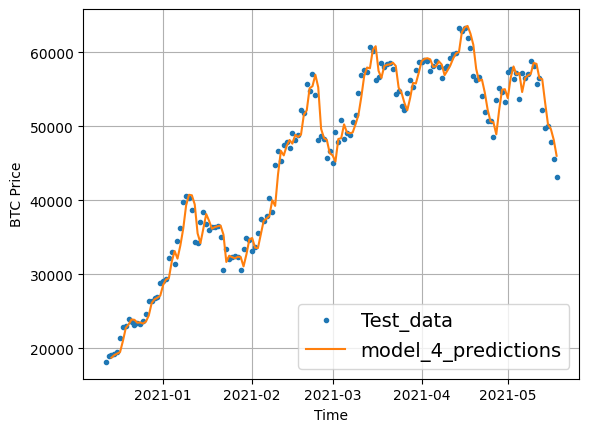

In [ ]:
offset = 400
plt.figure()
# account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=test_data, values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=test_data[-len(test_windows):], values=model_4_predictions, start=offset, format="-", label="model_4_predictions")

# Model 5: RNN (LSTM)

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use 7 timesteps in the past

In [ ]:
# make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
# make train and testing windows
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(windows=full_windows, labels=full_labels)
train_windows.shape, train_horizons.shape, test_windows.shape, test_horizons.shape

((2224, 7, 1), (2224, 1, 1), (556, 7, 1), (556, 1, 1))

In [ ]:
# reshape the last dimension for train_windows and test_windows
train_windows = train_windows.reshape((train_windows.shape[0], train_windows.shape[2], train_windows.shape[1]))
test_windows = test_windows.reshape((test_windows.shape[0], test_windows.shape[2], test_windows.shape[1]))
train_windows.shape, test_windows.shape

((2224, 1, 7), (556, 1, 7))

In [ ]:
import tensorflow as tf

# create model
model_5 = tf.keras.Sequential([
    # set return_sequences=True so multiple recurrent layers can be stacked on top of each other
    tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True),
    tf.keras.layers.LSTM(units=128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_5_lstm") # give the model a name so we can save it

# compile model
model_5.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_5.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_horizons, # horizon value of 1
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_5.name)], # create ModelCheckpoint callback to save best model
            verbose=1)

Epoch 1/100
18/18 [==============================] - 7s 214ms/step - loss: 2605.3945 - mae: 2605.3945 - val_loss: 7689.4487 - val_mae: 7689.4487
Epoch 2/100
18/18 [==============================] - 3s 148ms/step - loss: 432.7923 - mae: 432.7923 - val_loss: 1889.2115 - val_mae: 1889.2115
Epoch 3/100
18/18 [==============================] - 3s 183ms/step - loss: 216.2597 - mae: 216.2597 - val_loss: 1180.7249 - val_mae: 1180.7249
Epoch 4/100
18/18 [==============================] - 2s 144ms/step - loss: 173.8795 - mae: 173.8795 - val_loss: 915.2012 - val_mae: 915.2012
Epoch 5/100
18/18 [==============================] - 3s 192ms/step - loss: 162.6595 - mae: 162.6595 - val_loss: 890.3586 - val_mae: 890.3586
Epoch 6/100
18/18 [==============================] - 0s 19ms/step - loss: 159.3057 - mae: 159.3057 - val_loss: 947.0356 - val_mae: 947.0356
Epoch 7/100
18/18 [==============================] - 3s 160ms/step - loss: 159.5755 - mae: 159.5755 - val_loss: 873.8729 - val_mae: 873.8729
Epoch 

In [ ]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_185 (Dense)           (None, 1)                 129       
                                                                 
Total params: 201345 (786.50 KB)
Trainable params: 201345 (786.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# evaluate model
model_5.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 586.3565 - mae: 586.3565


[586.3565063476562, 586.3565063476562]

In [ ]:
# load in best performing model
model_5_loaded = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5_loaded.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 569.2646 - mae: 569.2646


[569.2645874023438, 569.2645874023438]

In [ ]:
# get forecast predictions
model_5_predictions = make_predictions(model_5_loaded, input_data=test_windows)
model_5_predictions

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8853.696 ,  8756.63  ,  9026.056 ,  8781.26  ,  8734.361 ,
        8770.241 ,  8658.062 ,  8526.044 ,  8461.687 ,  8521.943 ,
        8259.442 ,  8104.494 ,  8071.5835,  7687.1743,  7319.4478,
        7286.436 ,  7106.718 ,  7189.8184,  7168.6436,  7458.812 ,
        7469.5317,  7687.1016,  7637.5176,  7400.568 ,  7347.6025,
        7303.186 ,  7222.8213,  7365.1245,  7519.752 ,  7552.479 ,
        7576.8296,  7385.048 ,  7241.398 ,  7195.171 ,  7177.26  ,
        7231.4214,  7119.525 ,  7102.4653,  6925.049 ,  6613.562 ,
        7270.208 ,  7261.744 ,  7134.53  ,  7317.684 ,  7252.9507,
        7187.075 ,  7234.2446,  7227.301 ,  7193.026 ,  7230.5107,
        7311.003 ,  7393.774 ,  7294.81  ,  7193.639 ,  7176.497 ,
        6983.809 ,  7222.245 ,  7367.5347,  7360.0825,  7696.2104,
        8048.212 ,  8127.9707,  7898.7065,  8053.5767,  8114.6064,
        8143.983 ,  8157.82  ,  8656.325 ,  8912.573 ,  8778.881 ,
        8938.2

In [ ]:
# get metrics
model_5_results = get_metrics(y_true=tf.squeeze(test_horizons), # remove 1 dimension of test labels
                              y_pred=model_5_predictions)
model_5_results

{'mae': 569.2646,
 'mse': 1172070.0,
 'rmse': 1082.6218,
 'mape': 2.5481212,
 'mase': 1.0000402}

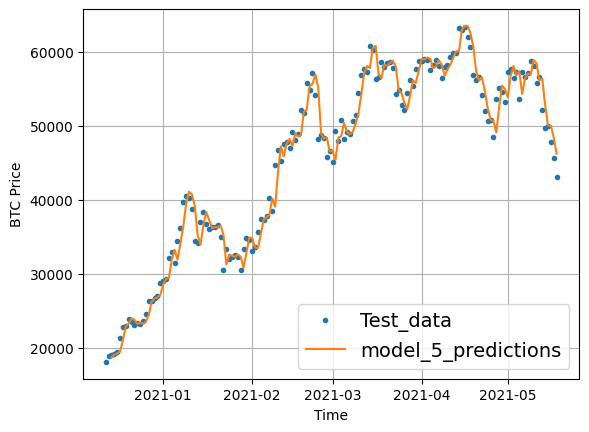

In [ ]:
offset = 400
plt.figure()
# account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=test_data, values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=test_data[-len(test_windows):], values=model_5_predictions, start=offset, format="-", label="model_5_predictions")

# Make a multivariate time series

All of the models have been trained on a single variable (also called univariate time series): the historical price of Bitcoin.

What would be better is if we passed our model something related to Bitcoin (more information is a vague term because we could actually feed almost anything to our models and they would still try to find patterns, since in an open system like a market, you could argue everything is related).

This will be different for almost every time series you work on but in our case, we could try to see if the Bitcoin block reward size adds any predictive power to our models.

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

Let's encode this information into our time series data and see if it helps a model's performance.

**Note:** Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from **univariate** (only the historical price of Bitcoin) to **multivariate** (the price of Bitcoin as well as the block reward size).



In [ ]:
import numpy as np

# block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block.insert(loc=len(bitcoin_prices_block.columns),
                            column="Block Reward",
                            value=None,
                            allow_duplicates=True)

# set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block

,Price,Block Reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

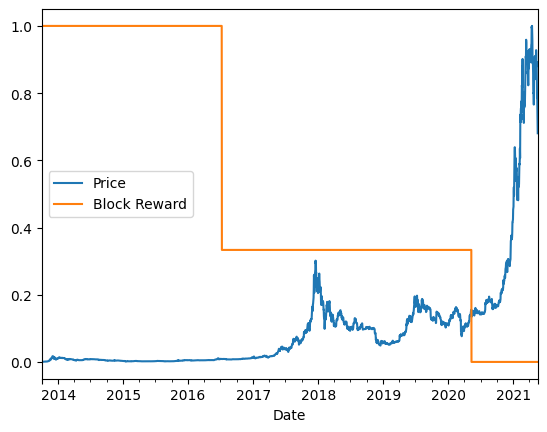

In [ ]:
# plot the block reward/price over time
from sklearn.preprocessing import MinMaxScaler

price_scaled = MinMaxScaler().fit_transform(np.expand_dims(bitcoin_prices_block['Price'].to_numpy(), axis=1))
block_reward_scaled = MinMaxScaler().fit_transform(np.expand_dims(bitcoin_prices_block['Block Reward'].to_numpy(), axis=1))
price_block_reward_zip = zip(np.squeeze(price_scaled), np.squeeze(block_reward_scaled))

scaled_price_block_reward_df = pd.DataFrame(list(price_block_reward_zip), # we need to scale the data first
                                            columns=bitcoin_prices_block.columns,
                                            index=bitcoin_prices_block.index)
scaled_price_block_reward_df.plot()

Note: Because of the different scales of our values we'll scale them to be between 0 and 1.

# Making a windowed dataset with pandas

Since our data is in a pandas DataFrame, we can leverage the `pandas.DataFrame.shift()` method to create a windowed multivariate time series.

The `shift()` method offsets an index by a specified number of periods.

In [ ]:
# setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,Block Reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# create train and test datasets, remove the NaN's and convert to float32 to prevent TensorFlow errors
features = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
labels = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
features.head()

,Block Reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
labels.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# make train and test sets
split_size = int(len(features) * 0.8)
X_train, y_train = features[:split_size], labels[:split_size]
X_test, y_test = features[split_size:], labels[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Dense (multivariate time series)

In [ ]:
import tensorflow as tf

# create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_6_dense") # give the model a name so we can save it

# compile model
model_6.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# fit model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)], # create ModelCheckpoint callback to save best model
            verbose=1)


Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1003.2924 - mae: 1003.2924 - val_loss: 3180.9319 - val_mae: 3180.9321
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 301.1240 - mae: 301.1240 - val_loss: 1066.1929 - val_mae: 1066.1929
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 200.5660 - mae: 200.5660 - val_loss: 1007.5939 - val_mae: 1007.5939
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 180.4595 - mae: 180.4595 - val_loss: 958.9481 - val_mae: 958.9481
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 169.3836 - mae: 169.3836 - val_loss: 953.2120 - val_mae: 953.2120
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 163.6547 - mae: 163.6547 - val_loss: 894.8673 - val_mae: 894.8673
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 160.4382 - mae: 160.4382 - val_loss: 1008.5912 - val_mae: 1008.5912
Epoch 8/100

In [ ]:
# evaluate model on test data
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.9355 - mae: 568.9355


[568.9354858398438, 568.9354858398438]

In [ ]:
# load in saved best performing model_1 and evaluate on test data
model_6_loaded = tf.keras.models.load_model("model_experiments/model_6_dense")
model_6_loaded.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 562.3384 - mae: 562.3384


[562.33837890625, 562.33837890625]

In [ ]:
# make predictions using model_1 on the test dataset and view the results
model_6_predictions = make_predictions(model_6_loaded, X_test)
model_6_predictions

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8854.2295,  8789.308 ,  9047.762 ,  8782.527 ,  8752.014 ,
        8745.478 ,  8687.283 ,  8529.546 ,  8467.79  ,  8537.746 ,
        8258.985 ,  8122.9673,  8073.2856,  7673.729 ,  7288.029 ,
        7267.0923,  7071.121 ,  7184.479 ,  7145.402 ,  7486.3267,
        7433.477 ,  7705.848 ,  7593.4614,  7418.85  ,  7344.0493,
        7323.127 ,  7240.361 ,  7377.2617,  7513.308 ,  7553.6787,
        7564.4927,  7372.8076,  7258.1123,  7205.5527,  7198.4385,
        7240.998 ,  7112.5435,  7112.8193,  6916.766 ,  6619.111 ,
        7314.475 ,  7222.092 ,  7165.246 ,  7262.984 ,  7266.962 ,
        7205.156 ,  7227.998 ,  7230.7676,  7203.302 ,  7230.1777,
        7314.85  ,  7396.8154,  7285.2227,  7196.0566,  7181.393 ,
        6992.8555,  7252.7944,  7350.593 ,  7371.2095,  7683.9443,
        8034.914 ,  8116.954 ,  7866.7466,  8062.062 ,  8112.6006,
        8172.322 ,  8135.3516,  8677.032 ,  8884.281 ,  8770.241 ,
        8914.6

In [ ]:
# get metrics from the predictions
model_6_results = get_metrics(y_true=np.squeeze(y_test), # reduce to right shape
                              y_pred=model_6_predictions)
model_6_results

{'mae': 562.3384,
 'mse': 1147821.9,
 'rmse': 1071.3645,
 'mape': 2.516508,
 'mase': 0.9878728}

# Model 7: N-BEATS algorithm

One of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the ***N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting)*** algorithm does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the M4 competition (a forecasting competition).

For our next modelling experiment we're going to be replicating the generic architecture of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

We're going to focus on:

1. Replicating the model architecture in Figure 1 of the N-BEATS paper

2. Using the same hyperparameters as the paper which can be found in Appendix D of the N-BEATS paper

Doing this will give us an opportunity to practice:

* Creating a custom layer for the `NBeatsBlock` by subclassing `tf.keras.layers.Layer`. Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times, such as a stack of N-BEATS blocks.
* Implementing a custom architecture using the Functional API
* Finding a paper related to our problem and seeing how it goes



## Building and testing an N-BEATS block ***custom layer***

In [ ]:
import tensorflow as tf

# create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, # the constructor takes all the hyperparameters for the layer
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
        """
        Invoking the constructor of the parent class

        super().__init__(**kwargs) calls the constructor of the parent class, passing any keyword arguments that have been collected in the kwargs dictionary.
        This allows the initialization of the parent class with the arguments provided to the child class.
        This is a way to enable the child class to use the constructor of the parent class, passing any necessary arguments it needs.

        super() is used to get the parent class of the current class.
        __init__ is the constructor method in Python that initializes an object when it is created.
        **kwargs is a way to accept an arbitrary number of keyword arguments as a dictionary within the method.
        """
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs): # the call method is what runs when the layer is called

        # define the 4 Dense layer stack of the N-BEATS block
        for layer in self.hidden: # pass inputs through each hidden layer
            outputs = layer(inputs)
        # define the output layer (Dense layer with linear activation) of the N-BEATS block
        theta = self.theta_layer(outputs)

        # output the backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

        return backcast, forecast


In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# set up NBeatsBlock layer to represent inputs and outputs
example_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                         theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                         horizon=HORIZON,
                                         n_neurons=128,
                                         n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
example_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
example_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# pass example inputs to example NBeatsBlock layer
backcast, forecast = example_nbeats_block_layer(example_inputs)

# these are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-1.0848093  0.7569556 -0.6582013  1.2090741  3.9745493  2.2474155
 -1.4573429]
Forecast: 2.1185550689697266


## Preparing data for the N-BEATS algorithm using `tf.data` API

We've got the basic building block for the N-BEATS architecture created.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the `tf.data` API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices.

In [ ]:
# add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

In [ ]:
# make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test), X, y

(2224,
 2224,
 556,
 556,
                  Price+1       Price+2       Price+3       Price+4  \
 Date                                                                 
 2013-10-08    121.795000    120.655330    121.338660    118.674660   
 2013-10-09    123.033000    121.795000    120.655330    121.338660   
 2013-10-10    124.049000    123.033000    121.795000    120.655330   
 2013-10-11    125.961160    124.049000    123.033000    121.795000   
 2013-10-12    125.279660    125.961160    124.049000    123.033000   
 ...                  ...           ...           ...           ...   
 2021-05-14  52147.821187  56573.555472  55715.546651  58102.191426   
 2021-05-15  49764.132082  52147.821187  56573.555472  55715.546651   
 2021-05-16  50032.693137  49764.132082  52147.821187  56573.555472   
 2021-05-17  47885.625255  50032.693137  49764.132082  52147.821187   
 2021-05-18  45604.615754  47885.625255  50032.693137  49764.132082   
 
                  Price+5       Price+6       Pri

Now let's convert them into TensorFlow `tf.data.Dataset` to ensure they run as fast as possible whilst training.

We'll do this by:

* Turning the arrays in tensor Datasets using tf.data.Dataset.from_tensor_slices()
* Combine the labels and features tensors into a Dataset using `tf.data.Dataset.zip()`
* Batch and prefetch the Datasets using `batch()` and `prefetch()`

Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible.


In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters for N-BEATS algorithm


In [ ]:
# values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

## Building, compiling and fitting the N-BEATS algorithm

What powers N-BEATS are double residual stacking.

Both of these layer functions are straight-forward, subtract or add tensors.

The power of residual stacking or residual connections was revealed in **Deep Residual Learning for Image Recognition** where the authors were able to build a deeper but less complex neural network (this is what introduced the popular **ResNet architecture**) than previous attempts.

This deeper neural network led to state of the art results on the ImageNet challenge in 2015 and different versions of residual connections have been present in deep learning ever since.

What is a residual connection?

A residual connection (also called skip connections) involves a late neural network layer receiving the outputs as well as the inputs of an early neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:

* Subtract the backcast outputs from a previous block from the backcast inputs to the current block

* Add the forecast outputs from all blocks together in a stack

What are the benefits of residual connections?

In practice, residual connections have been beneficial for training deeper models (N-BEATS reaches ~150 layers, also see "These approaches provide clear advantages in improving the trainability of deep architectures" in section 3.2 of the N-BEATS paper).

It's thought that they help avoid the problem of vanishing gradients (patterns learned by a neural network not being passed through to deeper layers).

We've got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm:

1. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)

2. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)

3. Make the initial backcast and forecasts for the model with the layer created in (2)

4. Use a for loop to create stacks of block layers

5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs together using tf.keras.Model()

8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper

9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:

* `tf.keras.callbacks.EarlyStopping()` - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using `restore_best_weights=True` (this'll prevent the model from training for long periods of time without improvement)
* `tf.keras.callbacks.ReduceLROnPlateau()` - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)


In [ ]:
%%time

# 1. Create input to stacks
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 2. Define initial N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)

# Add in subtraction residual link
residuals = tf.keras.layers.subtract([stack_input, backcast])

# 4. Create stacks of blocks
for i in range(N_STACKS-1): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i+1}")(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = tf.keras.layers.subtract([residuals, backcast])
    forecast = tf.keras.layers.add([forecast, block_forecast])

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer="adam",
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, min_delta=1e-3, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=100, min_delta=1e-3, min_lr=1e-5, verbose=1)])



Epoch 135: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
CPU times: user 34.9 s, sys: 786 ms, total: 35.6 s
Wall time: 36.2 s


In [ ]:
# evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 590.6791 - mae: 590.6791 - mse: 1200287.1250


[590.6790771484375, 590.6790771484375, 1200287.125]

In [ ]:
# make predictions with N-BEATS model
model_7_predictions = make_predictions(model_7, test_dataset)
model_7_predictions

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8819.106 ,  8741.257 ,  9126.036 ,  8783.966 ,  8707.605 ,
        8853.01  ,  8607.652 ,  8501.236 ,  8495.772 ,  8531.329 ,
        8246.74  ,  8080.726 ,  8153.1113,  7638.322 ,  7242.767 ,
        7342.563 ,  7095.121 ,  7165.5083,  7227.831 ,  7493.7993,
        7472.235 ,  7673.523 ,  7609.086 ,  7371.5767,  7338.635 ,
        7331.0884,  7202.799 ,  7420.558 ,  7563.484 ,  7530.056 ,
        7541.897 ,  7354.412 ,  7215.33  ,  7205.6353,  7188.4756,
        7261.51  ,  7131.2007,  7072.911 ,  6922.3774,  6573.004 ,
        7292.456 ,  7325.2427,  7106.4585,  7252.3086,  7247.512 ,
        7178.5884,  7240.1567,  7197.0312,  7153.8223,  7216.7544,
        7294.8335,  7365.628 ,  7265.0903,  7151.8716,  7154.418 ,
        6960.6943,  7248.657 ,  7426.304 ,  7334.738 ,  7661.426 ,
        8027.495 ,  8159.894 ,  7905.167 ,  8000.6724,  8084.224 ,
        8097.1743,  8138.075 ,  8662.752 ,  8898.816 ,  8812.954 ,
        8886.2

In [ ]:
# evaluate N-BEATS model predictions
model_7_results = get_metrics(y_true=y_test,
                              y_pred=model_7_predictions)
model_7_results

{'mae': 590.6791,
 'mse': 1200287.1,
 'rmse': 1095.5762,
 'mape': 2.7095494,
 'mase': 1.0376595}

## Plotting the N-BEATS architecture

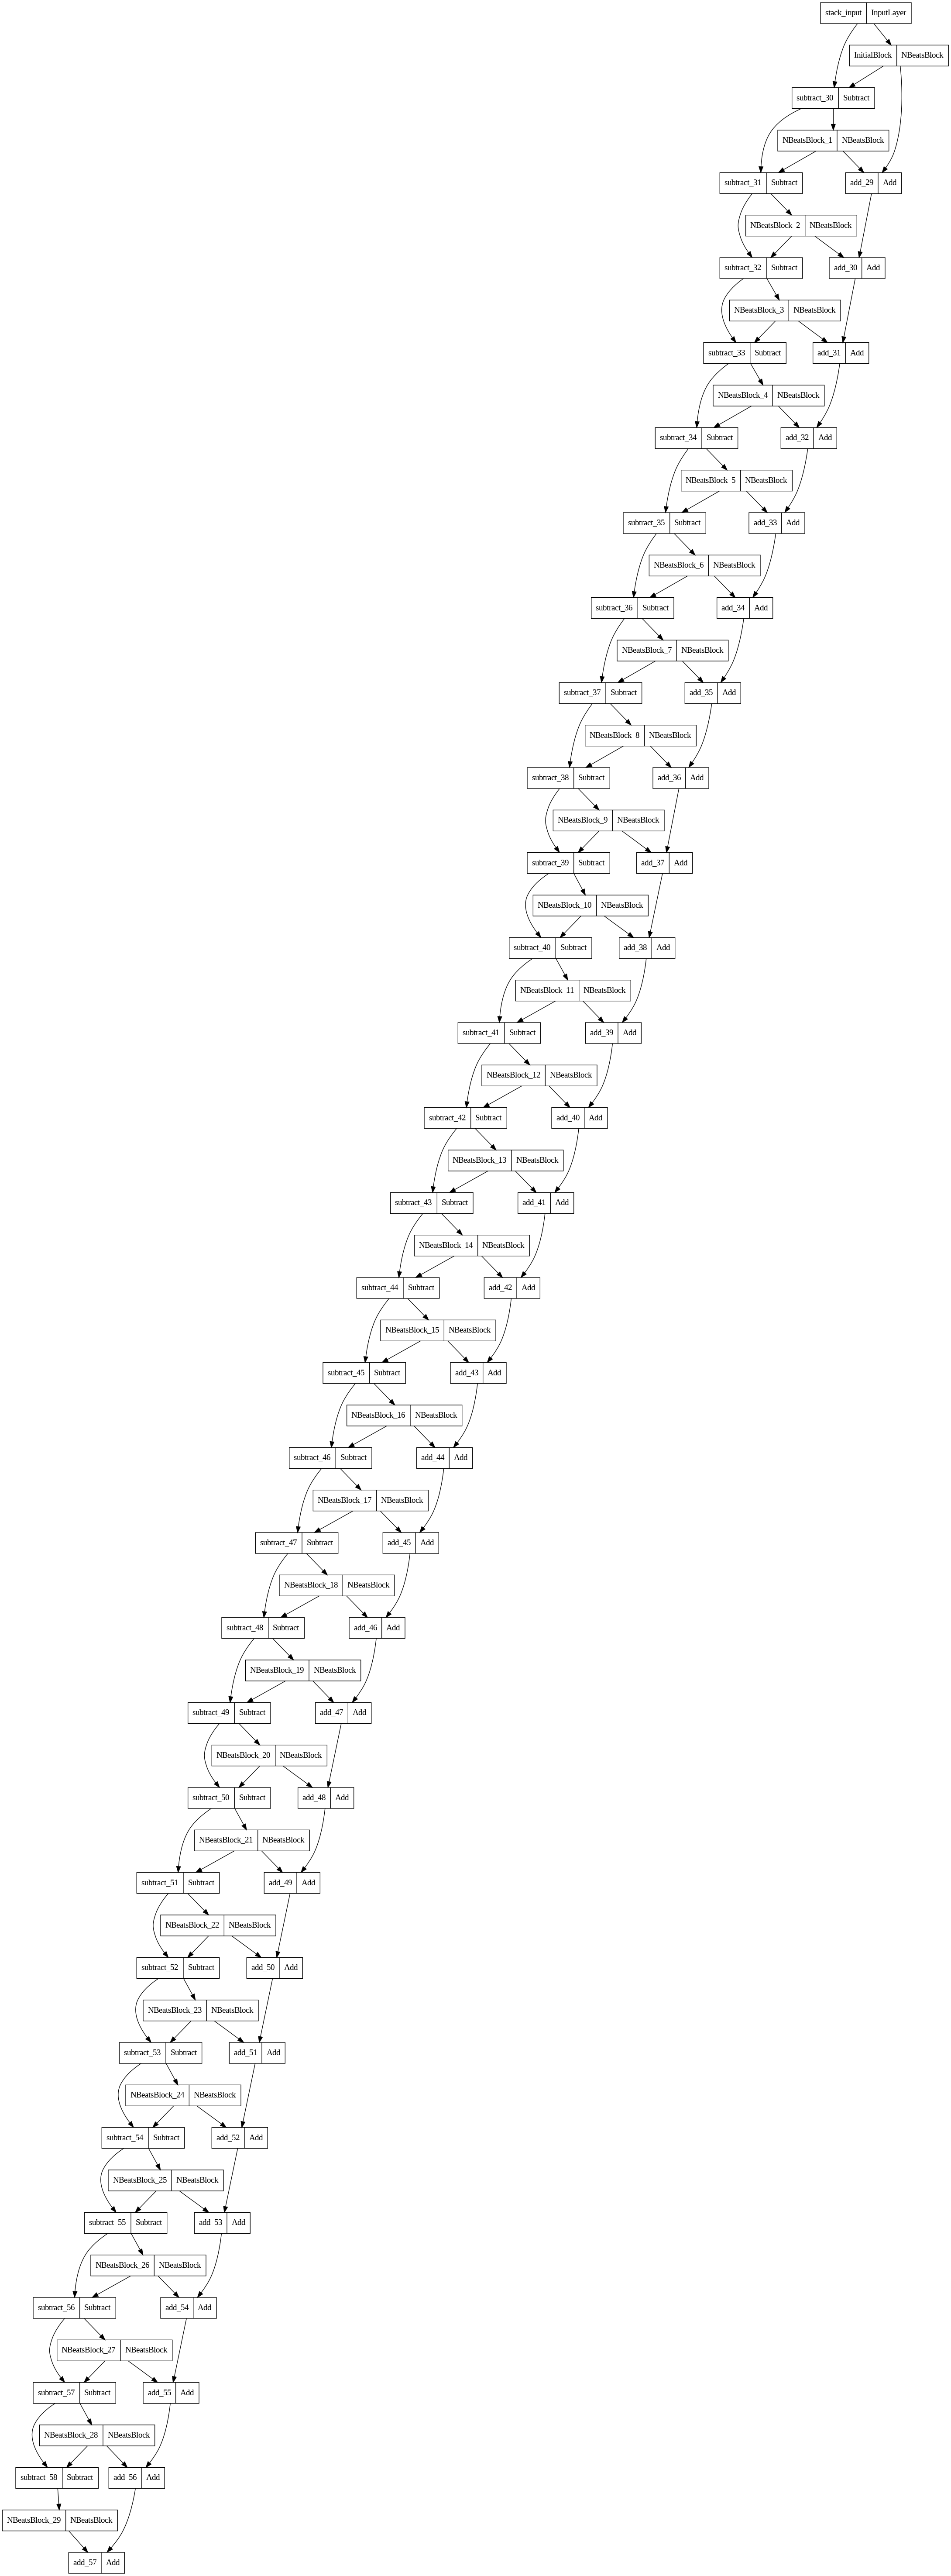

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

 **Note:** Our N-BEATS model replicates the N-BEATS generic architecture, the training setups are largely the same, except for the N-BEATS paper used an ensemble of models to make predictions (multiple different loss functions and multiple different lookback windows), see Table 18 of the N-BEATS paper for more.

# Model 8: Creating an ensemble (stacking different models together)

After all that effort, the N-BEATS algorithm's performance did not beat the performance of Naïve forecast.

Our next experiment is creating an ensemble of models.

An ensemble involves training and combining multiple different models on the same problem. ***Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.***

For example, in the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:

* Different loss functions (sMAPE, MASE and MAPE)
* Different window sizes

**The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can take the average or median of many different models.**

The keyword being: different.

It wouldn't make sense to train the same model 10 times on the same data and then average the predictions.

Due to their random initialization, even deep learning models with the same architecture can produce different results.

**Each time you create a deep learning model, it starts with random patterns (weights & biases) and then it adjusts these random patterns to better suit the dataset it's being trained on.**

However, the process it adjusts these patterns is often a form of guided randomness as well (the SGD optimizer stands for stochastic or random gradient descent).

To create our ensemble models we're going to be using a combination of:

* Different loss functions (MAE, MSE, MAPE)
* Randomly initialized models

Essentially, we'll be creating a suite of different models all attempting to model the same data.

We'll start by creating a function to produce a list of different models trained with different loss functions. Each layer in the ensemble models will be initialized with a random normal (Gaussian) distribution using He normal initialization, this'll help estimating the prediction intervals later on.

**Note:** In your machine learning experiments, you may have already dealt with examples of ensemble models. Algorithms such as the **random forest model are a form of ensemble**, it uses a number of randomly created decision trees where each individual tree may perform poorly but when combined gives great results.

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
    """
    # make empty list for trained ensemble models
    ensemble_models = []

    # create num_iter number of models per loss function
    for i in range(num_iter):
        # build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i+1}")

            # construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # initialize layers with normal (Gaussian) distribution so we can use the models for prediction
                # interval estimation later
                tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                tf.keras.layers.Dense(HORIZON)
            ])

            # compile simple model with current loss function
            model.compile(loss=loss_function,
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["mae", "mse"])

            # fit model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      # add callbacks to prevent training from going/stalling for too long
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, min_delta=1e-3, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=100, min_delta=1e-3, min_lr=1e-5, verbose=1)])

            # append fitted model to list of ensemble models
            ensemble_models.append(model)

    return ensemble_models # return list of trained models

In [ ]:
%%time
# get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 648: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 264: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mae for 1000 epochs, model number: 2

Epoch 645: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mse for 1000 epochs, model number: 2

Epoch 342: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mape for 1000 epochs, model number: 2

Epoch 212: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mae for 1000 epochs, model number: 3

Epoch 875: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Optimizing model by reducing: mse for 1000 epochs, mode

## Create a function which uses a list of trained models to make and return a list of predictions

In [ ]:
def make_ensemble_predictions(ensemble_models, data):
    models_predictions = []
    for model in ensemble_models:
        prediction = model.predict(data) # make predictions with current ensemble model
        models_predictions.append(prediction)
    return tf.constant(tf.squeeze(models_predictions))

In [ ]:
# create a list of ensemble predictions
ensemble_predictions = make_ensemble_predictions(ensemble_models=ensemble_models,
                                                 data=test_dataset)
ensemble_predictions

1/1 [==============================] - 0s 57ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8831.808,  8840.757,  9124.545, ..., 50726.04 , 48796.504,
        46115.5  ],
       [ 8768.855,  8723.825,  8985.271, ..., 50284.08 , 48360.883,
        46156.42 ],
       [ 8791.772,  8826.177,  9071.532, ..., 50344.51 , 48314.8  ,
        45248.668],
       ...,
       [ 8774.03 ,  8800.631,  9086.38 , ..., 50812.95 , 48851.426,
        46306.246],
       [ 8828.688,  8750.607,  9030.075, ..., 48958.64 , 48415.035,
        45334.566],
       [ 8789.816,  8745.215,  8995.225, ..., 49753.99 , 49034.113,
        46726.402]], dtype=float32)>

In [ ]:
# evaluate ensemble predictions using the mean method
ensemble_results_mean = get_metrics(y_true=y_test,
                                    y_pred=ensemble_predictions) # take the median across all ensemble predictions
ensemble_results_mean

{'mae': 593.19244,
 'mse': 1208244.9,
 'rmse': 1099.2019,
 'mape': 2.7181585,
 'mase': 1.0420749}

In [ ]:
import numpy as np

# evaluate ensemble predictions using the median method
ensemble_results_median = get_metrics(y_true=y_test,
                                      y_pred=np.median(ensemble_predictions, axis=0)) # take the median across all ensemble predictions
ensemble_results_median

{'mae': 571.67914,
 'mse': 1145796.6,
 'rmse': 1070.419,
 'mape': 2.59365,
 'mase': 1.0042819}

## Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points.

Meaning, given a set of WINDOW_SIZE=7 values, the model will predict HORIZION=1.

But what might be more helpful than a single value?

***Knowing the range of values*** a model is predicting may help you make better decisions for your forecasts.

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Why?

Because ***point predictions are almost always going to be wrong***. So having a range of values can help with decision making.

One way of getting the 95% condfidence prediction intervals for a deep learning model is the **bootstrap method**:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# find upper and lower bounds of ensemble predictions

# 1. Take the predictions of multiple randomly initialized deep learning neural networks
def get_upper_lower(predictions):

    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(predictions, axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # 4. Get the prediction interval upper and lower bounds from the mean of the predictions
    preds_mean = tf.reduce_mean(predictions, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

# get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(predictions=ensemble_predictions)

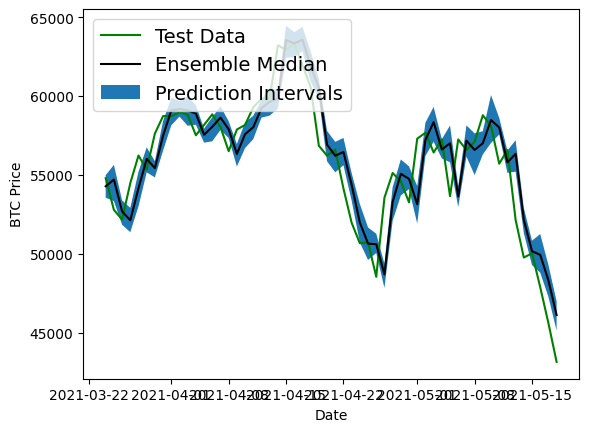

In [ ]:
import matplotlib.pyplot as plt

# get the median values of our ensemble predictions
ensemble_median = np.median(ensemble_predictions, axis=0)

# plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure()
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

We've just plotted:

* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be overfitting the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

**Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian.

# Model 9: Train a model on the full historical data to make predictions into future

It's time we created a model which is able to make future predictions on the price of Bitcoin.

To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

Why use the full dataset?

Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

**Note:** Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out, you'll have to retrain your model to incorporate that new price to predict the next forecast.

In [ ]:
# train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "Block Reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Turn windows and horizons into performance optimized TensorFlow Datasets by:

1. Turning X_all and y_all into tensor Datasets using `tf.data.Dataset.from_tensor_slices()`
2. Combining the features and labels into a Dataset tuple using `tf.data.Dataset.zip()`
3. Batch and prefetch the data using `tf.data.Dataset.batch()` and `tf.data.Dataset.prefetch()` respectively

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
])

# compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

## Make predictions on the future

As you've seen so far, our machine learning models have performed quite poorly at predicting the price of Bitcoin (time series forecasting in open systems is typically a game of luck), often worse than the naive forecast.

That doesn't mean we can't use our models  right?

To try and predict into the future we start by defining a variable `INTO_FUTURE` which decides how many timesteps we'd like to predict into the future.

Then we create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:

1. Function which takes as input:
* a list of values (the Bitcoin historical data)
* a trained model
* a window into the future to predict (our `INTO_FUTURE` variable)
* the `WINDOW_SIZE` a model was trained on - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction

Eventually future predictions will be made using the model's own previous predictions as input.

In [ ]:
# timesteps to predict into the future
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Makes future forecasts into_future steps after values ends.

    Returns future forecasts as list of floats.
    """
    # 2. Make an empty list for future forecasts/prepare data to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
    for _ in range(into_future):

        # predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        # append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        print(future_forecast)

        # update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

    return future_forecast


In [ ]:
# make forecasts into future of the price of Bitcoin
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55888.91015625

[55888.91]
1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55888.91015625] -> Prediction: 51559.5078125

[55888.91, 51559.508]
1/1 [==============================] - 0s 26ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55888.91015625 51559.5078125 ] -> Prediction: 49023.07421875

[55888.91, 51559.508, 49023.074]
1/1 [==============================] - 0s 30ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55888.91015625 51559.5078125  49023.07421875] -> Prediction: 49820.46484375

[55888.91, 51559.508, 49023.074, 49820.465]
1/1 [==============================] - 0s 25ms/step
Predict

## Plot future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns array of datetime values from ranging from start_date to start_date+into_future.

    Parameters
    start_date: date to start range (np.datetime64)
    into_future: number of days to add onto start date for range (int)
    offset: number of days to offset start_date by
    """
    start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
    end_date = start_date + np.timedelta64(into_future, "D") # specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps, len(next_time_steps)

(array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
        '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
        '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
        '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 14)

In [ ]:
future_forecast, len(future_forecast)

([55888.91,
  51559.508,
  49023.074,
  49820.465,
  46670.2,
  45423.402,
  48210.09,
  54912.703,
  50669.824,
  48852.953,
  49007.37,
  46111.93,
  47029.367,
  51340.52],
 14)

In [ ]:
# insert last timestep into next_time_steps
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_prices.values[-1])
next_time_steps, future_forecast, len(next_time_steps), len(future_forecast)

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55888.91 , 51559.508, 49023.074, 49820.465, 46670.2  ,
        45423.402, 48210.09 , 54912.703, 50669.824, 48852.953, 49007.37 ,
        46111.93 , 47029.367, 51340.52 ], dtype=float32),
 15,
 15)

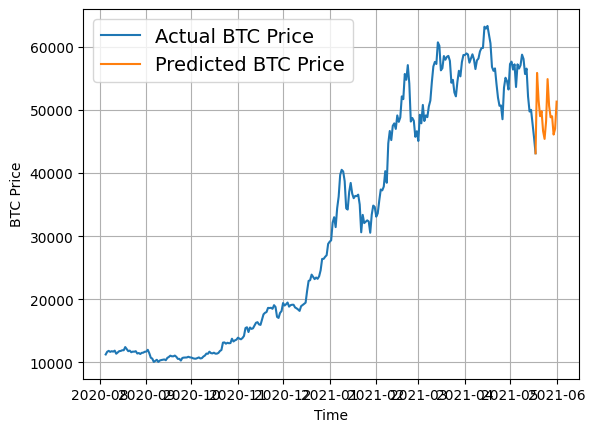

In [ ]:
# plot future price predictions of Bitcoin
plt.figure()
plot_time_series(bitcoin_prices.index, bitcoin_prices.values, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

Perhaps that's due to our model overfitting the training data and not generalizing well for future data. Also, as you could imagine, the further you predict into the future, the higher your chance for error.

But of course, we can't measure these predictions as they are because after all, they're predictions into the actual-future.

# Model 10: Why forecasting is such a hard task to accomplish? (the turkey problem)

***When creating any kind of forecast, you must keep the turkey problem in mind.***

The turkey problem is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

How does this relate to predicting the price of Bitcoin (or the price of any stock or figure in an open market)?

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Of course, this kind of scenario is unlikely.

But that doesn't take away from its significance.

We're going to manufacture a highly unlikely data point into the historical price of Bitcoin, the price falling 100x in one day.

**Note:** A very unlikely and unpredictable event such as the price of Bitcoin falling 100x in a single day is also referred to as a Black Swan event. A Black Swan event is an unknown unknown, you have no way of predicting whether or not it will happen but these kind of events often have a large impact.



In [ ]:
# introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = bitcoin_prices.values
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)

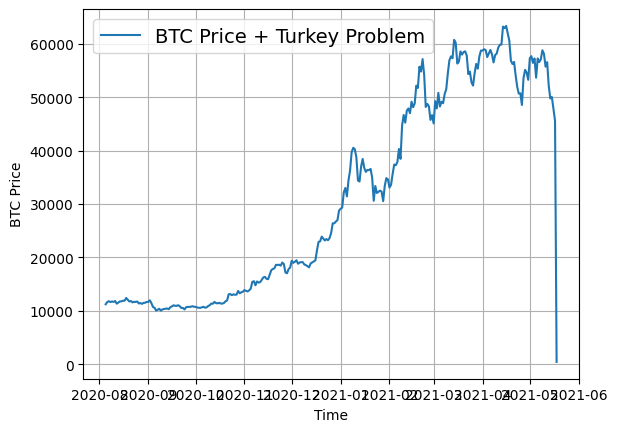

In [ ]:
plt.figure()
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window step:
 [[0 1 2 3 4 5 6 7]]

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2224, 556, 2224, 556)

## Building a turkey model (model to predict on turkey data)

In [ ]:
# create model architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_10_turkey_model") # give the model a name so we can save it

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1269.0294


1269.0294189453125

In [ ]:
# load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1268.9119


1268.911865234375

In [ ]:
# make predictions with Turkey model
turkey_preds = make_predictions(turkey_model, X_test)

18/18 [==============================] - 0s 4ms/step


In [ ]:
# evaluate turkey preds
turkey_results = get_metrics(y_true=y_test,
                             y_pred=turkey_preds)
turkey_results

{'mae': 17091.775,
 'mse': 615110340.0,
 'rmse': 24801.418,
 'mape': 120.71272,
 'mase': 26.449581}

Why does our model fail to capture the turkey problem data point?

A model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have significant impacts to the performance of our models.

# Compare Models


In [ ]:
# compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results_median,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,571.096436,1.177694e+06,1085.216064,2.555889,1.003258
model_2_dense_w30_h1,597.442871,1.215156e+06,1102.340942,2.738747,1.044336
model_3_dense_w30_h7,1234.489380,5.284851e+06,2298.880371,5.547508,2.196705
model_4_CONV1D,569.024414,1.183710e+06,1087.984253,2.555749,0.999618
model_5_LSTM,569.264587,1.172070e+06,1082.621826,2.548121,1.000040
model_6_multivariate,562.338379,1.147822e+06,1071.364502,2.516508,0.987873
model_8_NBEATs,590.679077,1.200287e+06,1095.576172,2.709549,1.037660
model_9_ensemble,571.679138,1.145797e+06,1070.418945,2.593650,1.004282
model_10_turkey,17091.775391,6.151103e+08,24801.417969,120.712723,26.449581


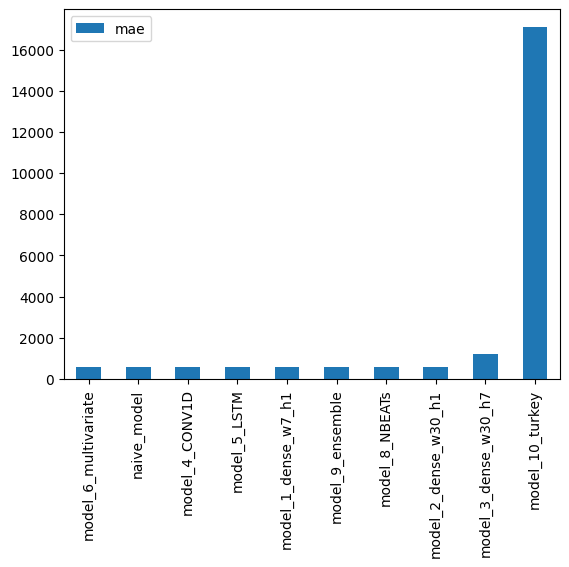

In [ ]:
# sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(kind="bar");